# TI3001C: Data Analytics and Artificial Intelligence Tools I
## M2. Data Engineering

### Content

1. Series and DataFrames
1. Columns manipulation
1. Index, selection and filtering
1. Operations
1. Date and time
1. Graph using DataFrame

In [68]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # librería para poder usad DataFrames (tablas)

In [76]:
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

### 1. Pandas

* Pandas is a Python library for data manipulation and analysis.
* Is primarily centered around two data structures: Series and DataFrames.
    * Series and DataFrames are fundamental data structures in various programming languages and libraries commonly used in data analysis and statistics.
    * They provide a flexible and intuitive way to store, organize, and work with tabular data.
    * They are ideal for tasks like data cleaning, analysis, and visualization.

#### 1.1 Series

* A one-dimensional labeled array capable of holding any data type (integers, strings, boolean values, etc.). 
* It can be thought of as a single column of data.

In [69]:
# we create a list of ice cream flavors
flavors = ["Chocolate", "Vanilla", "Strawberry", "Rum Raisin"]
# we create a Series with the list of ice cream flavors
ice_cream_flavors = pd.Series(flavors, name="Flavors") 
print(ice_cream_flavors)

0     Chocolate
1       Vanilla
2    Strawberry
3    Rum Raisin
Name: Flavors, dtype: object


In [70]:
# we create a Series with 10 random numbers
random_numbers = pd.Series(np.random.randint(0, 100, size=10), name="Random Numbers")
print(random_numbers)

0    44
1     0
2    17
3    27
4    56
5    27
6    70
7    13
8    41
9    38
Name: Random Numbers, dtype: int64


#### 1.2 DataFrame

* A two-dimensional labeled data structure with columns of potentially different types:
    * Unlike matrices, which require all elements to be of the same data type.
* It can be conceptualized as a table or spreadsheet, organizing data in rows and columns. 
* A DataFrame can be considered a collection of Series objects, where each Series represents a column. 

In [43]:
# changing the series to a DataFrame
df_ice_cream_flavors = pd.DataFrame(ice_cream_flavors)
print(df_ice_cream_flavors)

      Flavors
0   Chocolate
1     Vanilla
2  Strawberry
3  Rum Raisin


In [71]:
# create a pandas DataFrame of 100 rows and 4 columns with random values using numpy
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))
# we display the data frame
print(df)

     A   B   C   D
0   51  16  39  97
1   64  49  30  17
2   70  89  34  46
3   25  49   7  59
4   74  95   8  18
..  ..  ..  ..  ..
95   8  10  49  20
96  52  60  86  39
97  38  69  20  89
98  66  59  26  44
99  36  26  65  59

[100 rows x 4 columns]


In [3]:
# we define a function that can generate a DataFrame with random values
def generaDatos():

    df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

    return df

In [4]:
df = generaDatos()
print(df)

     A   B   C   D
0    6  25   8  48
1   93  10  50  13
2   15  75  62  88
3   68  46  98  49
4   29  14  41  76
..  ..  ..  ..  ..
95   5  67  98  28
96  82  20   8  56
97  50  82   7  15
98  97  93  15  23
99  76  20  30  72

[100 rows x 4 columns]


In [5]:
# we display the first rows of the DataFrame, n rows by default
df.head()

,A,B,C,D
0,6,25,8,48
1,93,10,50,13
2,15,75,62,88
3,68,46,98,49
4,29,14,41,76


In [6]:
# we display the last 10 rows of the DataFrame
df.tail(10)

,A,B,C,D
90,66,90,23,16
91,99,92,26,68
92,40,5,29,2
93,32,41,67,1
94,24,39,19,93
95,5,67,98,28
96,82,20,8,56
97,50,82,7,15
98,97,93,15,23
99,76,20,30,72


In [7]:
 # we display 7 random rows of the DataFrame
df.sample(7) 

,A,B,C,D
21,21,35,2,95
4,29,14,41,76
68,63,90,5,31
78,76,54,68,82
50,8,48,16,65
61,95,54,43,14
67,48,44,76,81


In [8]:
# we display the size of the DataFrame
# the size is the number of elements in the DataFrame
df.size

400

In [9]:
# we display the number of dimensions of the DataFrame
df.ndim

2

In [10]:
# we display the shape of the DataFrame
# the shape is the number of rows and colums: the tuple representing the dimensions of the DataFrame
df.shape

(100, 4)

In [11]:
# we display the names of the columns in the DataFrame
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
# we display the number of non-null values in the DataFrame
df.count()

A    100
B    100
C    100
D    100
dtype: int64

In [13]:
# we display the data types of the columns
df.dtypes

A    int64
B    int64
C    int64
D    int64
dtype: object

In [14]:
# we display the name, dtype and non-null values of each column in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       100 non-null    int64
 1   B       100 non-null    int64
 2   C       100 non-null    int64
 3   D       100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


### 2. Columns manipulation


Columns are fundamental to DataFrames, representing distinct variables or features.

* Column creation and manipulation:
    * Columns can be added, deleted, renamed, and their data types can be changed.
* Column selection:
    * Individual columns can be selected as Series, or multiple columns can be selected to form a new DataFrame.
* Column-wise operations:
    * Operations can be applied across entire columns, such as calculating the mean of a specific column.

In [77]:
# we create a list of lists
datos = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]    

In [78]:
# we create a DataFrame from the list of lists
df2 = pd.DataFrame(datos, columns=list('ABCD'))#['col1', 'col2', 'col3'])
df2

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16


In [8]:
# we add a new column "E"
df2["E"]=[6,7,2,5]
print(df2)

    A   B   C   D  E
0   1   2   3   4  6
1   5   6   7   8  7
2   9  10  11  12  2
3  13  14  15  16  5


In [9]:
# we remove the column "B" from the DataFrame
df2.pop("B") 
print(df2)

    A   C   D  E
0   1   3   4  6
1   5   7   8  7
2   9  11  12  2
3  13  15  16  5


In [10]:
# we rename the column "C" to "F"
df2 = df2.rename(columns={"C": "F"})
print(df2)
print()
# we rename the first column to "New_A"
df2.columns.values[0] = "New_A"
print(df2)
print()
df2.columns = ['col1', 'col2', 'col3','col4']
print(df2) 

    A   F   D  E
0   1   3   4  6
1   5   7   8  7
2   9  11  12  2
3  13  15  16  5

   New_A   F   D  E
0      1   3   4  6
1      5   7   8  7
2      9  11  12  2
3     13  15  16  5

   col1  col2  col3  col4
0     1     3     4     6
1     5     7     8     7
2     9    11    12     2
3    13    15    16     5


In [12]:
# we display the data type of the first column
df2['col1'].dtype

dtype('int64')

In [18]:
# we convert the first column to float
df2['col1'] = df2['col1'].astype(float)
# w convert the third column to string
df2['col3'] = df2['col3'].astype(str)
print(df2)
print()
df2.dtypes

   col1  col2 col3  col4
0   1.0     3    4     6
1   5.0     7    8     7
2   9.0    11   12     2
3  13.0    15   16     5



col1    float64
col2      int64
col3     object
col4      int64
dtype: object

### 3. Index, selection and filtering

Index:
* Both Series and DataFrames have an index.
* It provides labels for rows in DataFrames. 
* The index can be numeric, string-based, or datetime-based.

Selection:
* Data can be selected using various methods:
    * Label-based indexing (.loc): Selects data by label for both rows and columns.
    * Integer-location based indexing (.iloc): Selects data by integer position for both rows and columns.
    * Direct column selection: Accessing a single column by its name using square brackets (e.g., df['column_name']).

Filtering:
* Data can be filtered based on conditions applied to columns or rows, returning a subset of the data that meets the criteria.

#### 3.1 Index

In [44]:
print(df_ice_cream_flavors)

      Flavors
0   Chocolate
1     Vanilla
2  Strawberry
3  Rum Raisin


In [45]:
# we add a new column with the quantity of liters in existance
df_ice_cream_flavors['Qty liters'] = [100, 200, 150, 80]
print(df_ice_cream_flavors)

      Flavors  Qty liters
0   Chocolate         100
1     Vanilla         200
2  Strawberry         150
3  Rum Raisin          80


In [46]:
# we display the index of the dataframe
print(df_ice_cream_flavors.index.values)

[0 1 2 3]


In [47]:
# we set the column of flavors as the index
df_ice_cream_flavors = df_ice_cream_flavors.set_index('Flavors')
print(df_ice_cream_flavors)
print()
print(df_ice_cream_flavors.index.values)

            Qty liters
Flavors               
Chocolate          100
Vanilla            200
Strawberry         150
Rum Raisin          80

['Chocolate' 'Vanilla' 'Strawberry' 'Rum Raisin']


#### 3.2 Selection and Filtering

In [15]:
print(df)

     A   B   C   D
0    6  25   8  48
1   93  10  50  13
2   15  75  62  88
3   68  46  98  49
4   29  14  41  76
..  ..  ..  ..  ..
95   5  67  98  28
96  82  20   8  56
97  50  82   7  15
98  97  93  15  23
99  76  20  30  72

[100 rows x 4 columns]


In [ ]:
# we add a new column 'F' with random integers
df['F']=np.random.randint(0,100,size=(100, 1))
print(df)

     A   B   C   D   F
0    6  25   8  48   7
1   93  10  50  13  68
2   15  75  62  88  24
3   68  46  98  49  77
4   29  14  41  76  42
..  ..  ..  ..  ..  ..
95   5  67  98  28  75
96  82  20   8  56  18
97  50  82   7  15  60
98  97  93  15  23  37
99  76  20  30  72  77

[100 rows x 5 columns]


In [ ]:
# we filter the DataFrame considering the values in column 'C'
df_filtered = df[df['C']<50]
print(df_filtered)
df_filtered.shape

     A   B   C   D   F
0    6  25   8  48   7
4   29  14  41  76  42
6   81  37   9   4  93
9   54  94  18   1  14
11  21  81  22  91  78
12  70  77  30  76  35
13  58  61   2  22  61
15  65   7  48  59  59
16  60  41   5  51  87
17  67  24  25  95  67
21  21  35   2  95  35
23  74  91  36  42  23
24  19  55   0  93  93
25  67  43  21  88  53
27   0  36  30  65  53
32  83  42  30  68  92
33  23   7  48  67  29
34  56  25  10  54  66
35  40  57   5  26  22
37   4  42  49  36  87
42  59  98  42   9  37
43  52  10  39  14  21
44  10  28  43  47  58
45   5   9  41  13   0
49  39  19  24  44  15
50   8  48  16  65  58
57  72  11   5  13  46
58  83  34  20  10  63
60   4  49  19  72  97
61  95  54  43  14  65
62  14  48  12  39  40
66  28  44  22  61  56
68  63  90   5  31  89
69  94  64  10   6  81
70  26  22   0   3  32
72  97  62  26  94  18
73  23  61  48  12  68
79  46  92  41   9  27
80   5  19  43  32  44
85  93   1  38  87  73
88  22   5   1  88  26
90  66  90  23  16  41
91  99  92 

(49, 5)

In [ ]:
# we filter the DataFrame considering the values in columns 'B' and 'D'
df_filtered = df[(df['B']>45) & (df['D']<30)]
print(df_filtered)
df_filtered.shape

     A   B   C   D   F
9   54  94  18   1  14
13  58  61   2  22  61
35  40  57   5  26  22
40  52  84  86  29  65
42  59  98  42   9  37
48  98  65  84  29  57
56  11  79  54  20  62
59  81  80  61  26  88
61  95  54  43  14  65
64  32  98  95  12  33
69  94  64  10   6  81
73  23  61  48  12  68
77  74  66  69  10  68
79  46  92  41   9  27
81  70  83  91  11  56
84  36  52  80   8  24
90  66  90  23  16  41
95   5  67  98  28  75
97  50  82   7  15  60
98  97  93  15  23  37


(20, 5)

In [ ]:
# we filter the DataFrame considering the values in columns 'A', 'B' and 'F'
df_filtered = df[(df['A']<55) & (df['B']<78) &(df['F']>15)]
print(df_filtered)
df_filtered.shape

     A   B   C   D   F
2   15  75  62  88  24
4   29  14  41  76  42
8   40  34  67  60  91
19  15  30  82  17  38
21  21  35   2  95  35
22  53  47  78  37  52
24  19  55   0  93  93
26  10  23  74   9  23
27   0  36  30  65  53
30  13  25  58  25  39
33  23   7  48  67  29
35  40  57   5  26  22
37   4  42  49  36  87
38  44  70  92  63  36
41  31  39  62  27  23
43  52  10  39  14  21
44  10  28  43  47  58
46  31  31  87  14  78
50   8  48  16  65  58
60   4  49  19  72  97
62  14  48  12  39  40
66  28  44  22  61  56
67  48  44  76  81  71
70  26  22   0   3  32
71  40  27  57  60  44
73  23  61  48  12  68
75  39  70  81  88  62
76   2  43  70   1  52
80   5  19  43  32  44
84  36  52  80   8  24
88  22   5   1  88  26
92  40   5  29   2  39
94  24  39  19  93  73
95   5  67  98  28  75


(34, 5)

In [ ]:
# we filter the DataFrame considering the values in column 'A' and display specific columns
df_filtered = df[df['A']<55][["A", "D", "F"]]
print(df_filtered)
df_filtered.shape

     A   D   F
0    6  48   7
2   15  88  24
4   29  76  42
8   40  60  91
9   54   1  14
11  21  91  78
19  15  17  38
21  21  95  35
22  53  37  52
24  19  93  93
26  10   9  23
27   0  65  53
30  13  25  39
31  19  49  11
33  23  67  29
35  40  26  22
36   7  31  80
37   4  36  87
38  44  63  36
39   0  36   0
40  52  29  65
41  31  27  23
43  52  14  21
44  10  47  58
45   5  13   0
46  31  14  78
49  39  44  15
50   8  65  58
56  11  20  62
60   4  72  97
62  14  39  40
64  32  12  33
66  28  61  56
67  48  81  71
70  26   3  32
71  40  60  44
73  23  12  68
74  31  73  40
75  39  88  62
76   2   1  52
79  46   9  27
80   5  32  44
84  36   8  24
86  33  42   9
88  22  88  26
92  40   2  39
93  32   1   9
94  24  93  73
95   5  28  75
97  50  15  60


(50, 3)

In [42]:
# we display a specific range of rows and columns
df_filtered = df.loc[50:62, ["A", "B", "F"]]
print(df_filtered)
df_filtered.shape

     A   B   F
50   8  48  58
51  96  44   9
52  96  45  13
53  64  64  24
54  82  25  58
55  81  36  87
56  11  79  62
57  72  11  46
58  83  34  63
59  81  80  88
60   4  49  97
61  95  54  65
62  14  48  40


(13, 3)

In [46]:
df_filtered = df.iloc[25:42, 1:4]
print(df_filtered)
df_filtered.shape

     B   C   D
25  43  21  88
26  23  74   9
27  36  30  65
28  22  97  61
29  22  79  36
30  25  58  25
31   2  71  49
32  42  30  68
33   7  48  67
34  25  10  54
35  57   5  26
36  94  70  31
37  42  49  36
38  70  92  63
39  28  99  36
40  84  86  29
41  39  62  27


(17, 3)

### 4. Operations


Pandas supports a wide range of operations on Series and DataFrames:

* Arithmetic operations: Element-wise addition, subtraction, multiplication, division.
* Statistical operations: Mean, median, sum, standard deviation, etc.
* Data alignment: Operations on Series or DataFrames with different indices are automatically aligned based on their labels.
* Grouping and aggregation: Using groupby() to group data by categories and apply aggregation functions.
* Missing data handling: Methods like dropna() for removing missing values and fillna() for imputing them.

In [ ]:
# we subtract 7 from the filtered DataFrame
print(df_filtered - 7)

     B   C   D
25  36  14  81
26  16  67   2
27  29  23  58
28  15  90  54
29  15  72  29
30  18  51  18
31  -5  64  42
32  35  23  61
33   0  41  60
34  18   3  47
35  50  -2  19
36  87  63  24
37  35  42  29
38  63  85  56
39  21  92  29
40  77  79  22
41  32  55  20


In [ ]:
# we can do an operation on a specific column
print(df_filtered["B"] * 3)

25    129
26     69
27    108
28     66
29     66
30     75
31      6
32    126
33     21
34     75
35    171
36    282
37    126
38    210
39     84
40    252
41    117
Name: B, dtype: int64


In [ ]:
# we can do operations among columns
print(df_filtered["B"] + df_filtered["D"])

25    131
26     32
27    101
28     83
29     58
30     50
31     51
32    110
33     74
34     79
35     83
36    125
37     78
38    133
39     64
40    113
41     66
dtype: int64


In [ ]:
# we can do operations among dataFrames
print(df_filtered - df_filtered*.22)

        B      C      D
25  33.54  16.38  68.64
26  17.94  57.72   7.02
27  28.08  23.40  50.70
28  17.16  75.66  47.58
29  17.16  61.62  28.08
30  19.50  45.24  19.50
31   1.56  55.38  38.22
32  32.76  23.40  53.04
33   5.46  37.44  52.26
34  19.50   7.80  42.12
35  44.46   3.90  20.28
36  73.32  54.60  24.18
37  32.76  38.22  28.08
38  54.60  71.76  49.14
39  21.84  77.22  28.08
40  65.52  67.08  22.62
41  30.42  48.36  21.06


In [63]:
# we can display the maximum and minimum values, and other operations for each column
print("maximum values:")
print(df_filtered.max())
print()
print(df_filtered.min())
print()
print("mean values:")
print(df_filtered.mean())
print()
print("standard deviation values:")
print(df_filtered.std())
print()
print("sum values:")
print(df_filtered.sum())

maximum values:
B    94
C    99
D    88
dtype: int64

B    2
C    5
D    9
dtype: int64

mean values:
B    38.882353
C    57.705882
D    45.294118
dtype: float64

standard deviation values:
B    25.146775
C    29.997426
D    20.936704
dtype: float64

sum values:
B    661
C    981
D    770
dtype: int64


In [47]:
print(df_filtered.describe())

               B          C          D
count  17.000000  17.000000  17.000000
mean   38.882353  57.705882  45.294118
std    25.146775  29.997426  20.936704
min     2.000000   5.000000   9.000000
25%    23.000000  30.000000  29.000000
50%    36.000000  62.000000  36.000000
75%    43.000000  79.000000  63.000000
max    94.000000  99.000000  88.000000


### 5. Date and time

Pandas provides robust tools for handling date and time data:

* Datetime objects: Pandas can represent specific points in time using Timestamp objects, which are built upon Python's datetime objects.
* Time series indexing: Date and time information can be used as the index of a Series or DataFrame, enabling time-based operations and analysis.

### 6. Graph using DataFrame

In [8]:
import matplotlib.pyplot as plt # to plot

In [65]:
def graficaDatos(datos):

    plt.figure()
    plt.plot(datos["C"],label="Datos C", color='red')
    plt.grid(color='b',linestyle='dashed')
    plt.title('DATOS', fontweight='bold')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor C')
    plt.legend(loc='upper left')
    plt.show()

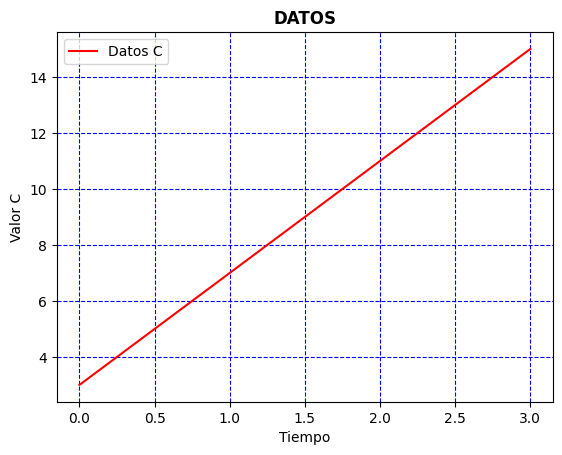

In [79]:
graficaDatos(df2)

In [80]:
def graficaValores(datos):

    plt.figure()
    plt.plot(datos["B"].sort_values(), datos["C"], label="Datos C", color='orange')
    plt.grid(color='b',linestyle='dashed')
    plt.title('DATOS', fontweight='bold')
    plt.xlabel('Valor B')
    plt.ylabel('Valor C')
    plt.legend(loc='upper right')
    plt.show()

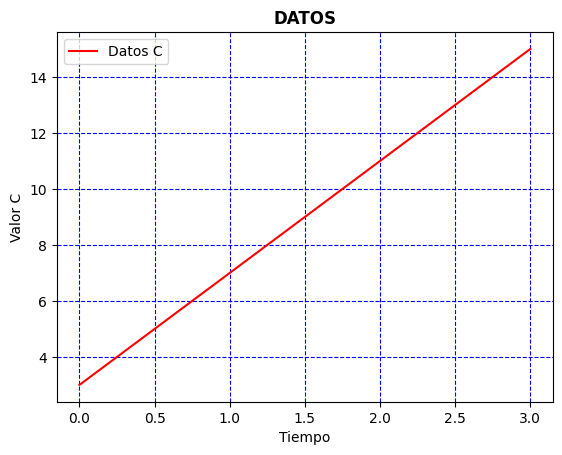

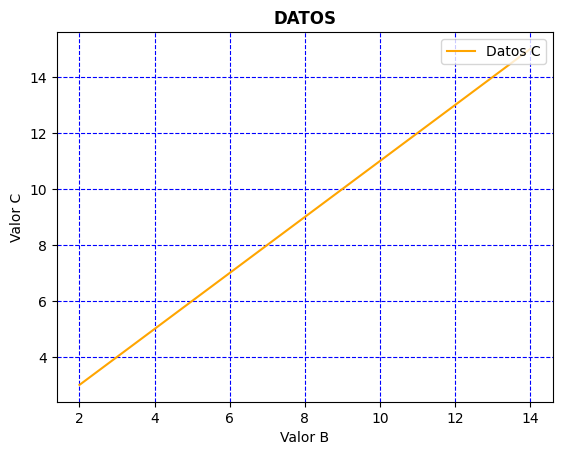

In [81]:
graficaDatos(df2)
graficaValores(df2)

In [21]:
df3 = generaDatos()
print(df3)

     A   B   C   D
0   43  39  17  75
1   82  20  59  93
2   19  12  51  62
3   30  38  43  77
4   22  12  33  50
..  ..  ..  ..  ..
95  12  37   7  60
96  18  84  46   9
97   8  40  37  56
98  83  46  64   0
99  99  67  21  89

[100 rows x 4 columns]


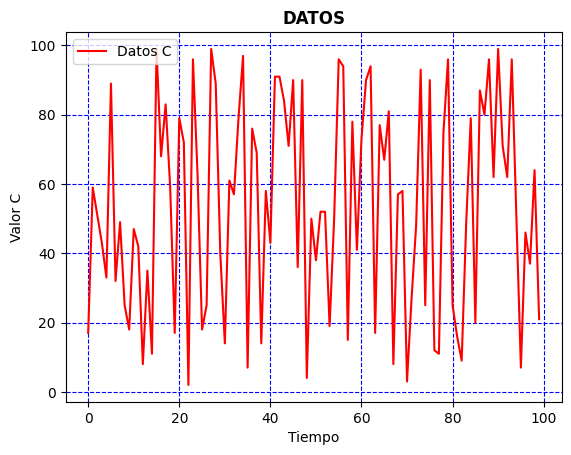

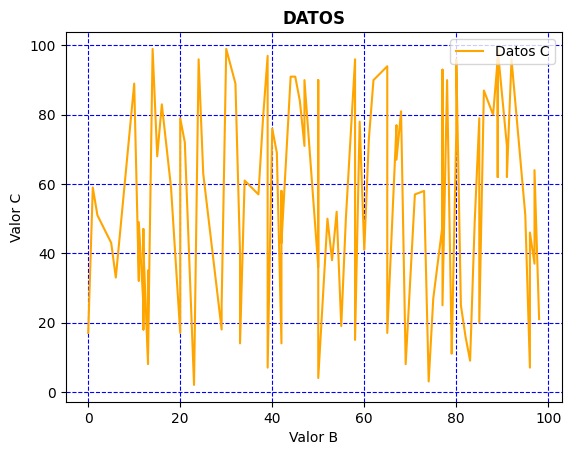

In [28]:
graficaDatos(df3)
graficaValores(df3)